In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\neeta\Desktop/IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [8]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
import seaborn as sns

In [10]:
df['species'] = df['species'].astype('category').cat.codes

In [11]:
# Features and target
X = df.drop(columns='species')
y = df['species']

In [12]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [13]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

In [14]:
# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


C:\Users\neeta\AppData\Local\Temp\ipykernel_24276\3290350970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


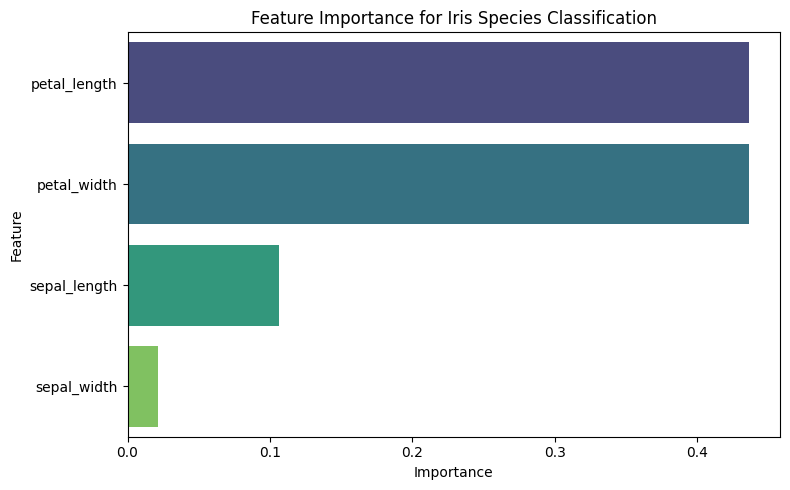

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Iris Species Classification')
plt.tight_layout()
plt.show()

In [16]:
print("Most significant feature:", importance_df.iloc[0]['Feature'])

Most significant feature: petal_length


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
logreg = LogisticRegression(multi_class='ovr', max_iter=200)
logreg.fit(X_scaled, y)

C:\Users\neeta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

In [20]:
coef_df = pd.DataFrame(logreg.coef_, columns=feature_names)
coef_df['Class'] = ['Setosa', 'Versicolor', 'Virginica']

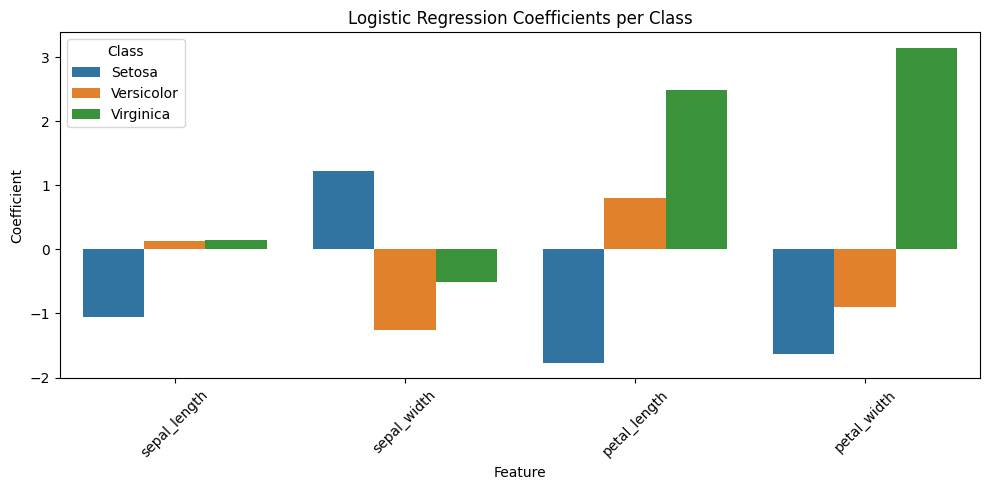

In [21]:
coef_melted = coef_df.melt(id_vars='Class', var_name='Feature', value_name='Coefficient')

plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Coefficient', hue='Class', data=coef_melted)
plt.title('Logistic Regression Coefficients per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)

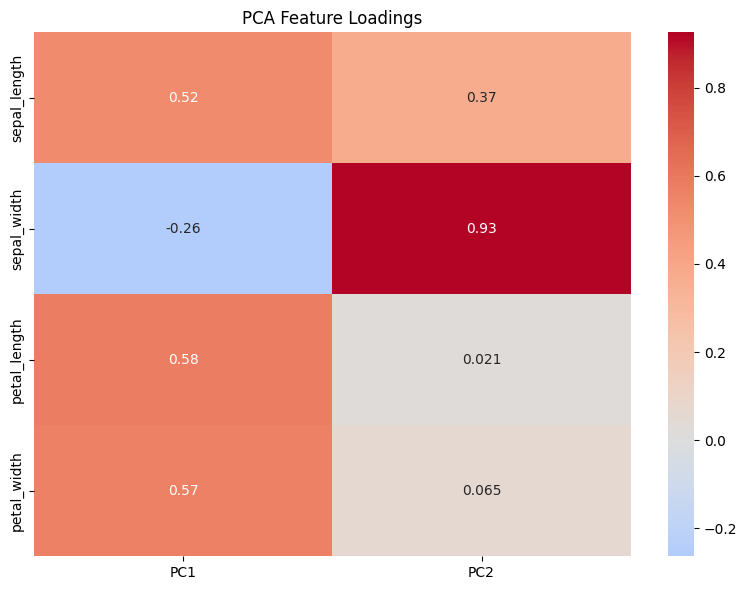

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Feature Loadings')
plt.tight_layout()
plt.show()

In [26]:
print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)

Explained variance by PC1 and PC2: [0.72770452 0.23030523]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict
y_pred = model.predict(X_test)

In [31]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [32]:
 #Precision, Recall, F1
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


In [33]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))


Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



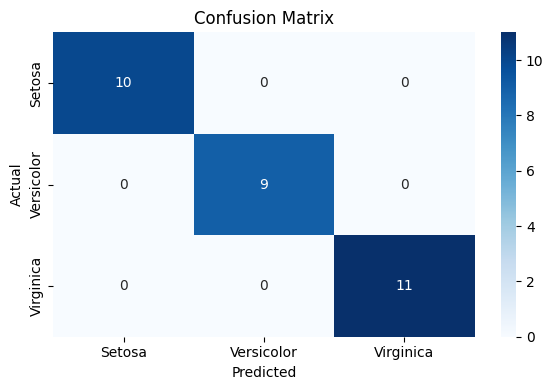

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# Train logistic regression model
model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(X_train, y_train)


C:\Users\neeta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

In [39]:
# Predict
y_pred = model.predict(X_test)

In [40]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9666666666666667
Precision (macro): 0.9722222222222222
Recall (macro): 0.9629629629629629
F1 Score (macro): 0.9658994032395567


In [41]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))



Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.89      0.94         9
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



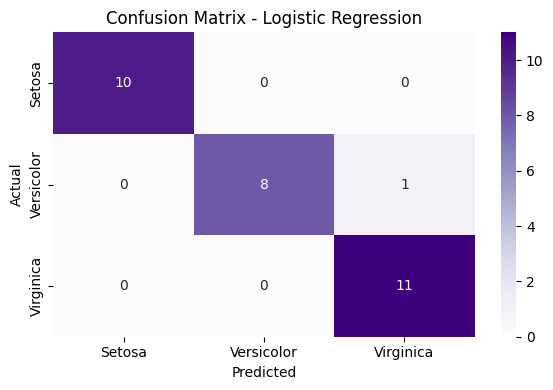

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
# 7. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



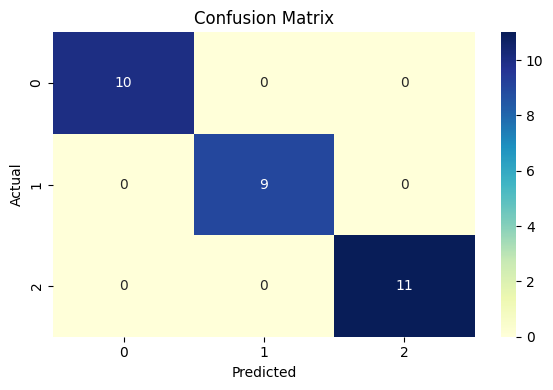

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()